In [20]:
using Graphs
using Bloqade
using Random
using GenericTensorNetworks
using Optim
using PythonCall
plt = pyimport("matplotlib.pyplot");

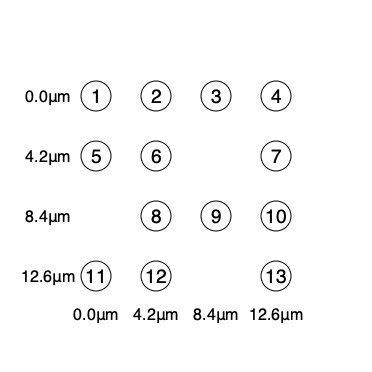

In [21]:
# changed scale

Random.seed!(2)
atoms = generate_sites(SquareLattice(), 4, 4; scale = 4.2) |> random_dropout(0.2)

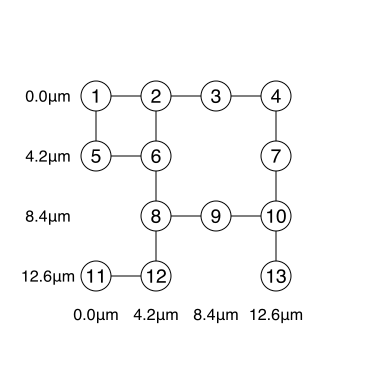

In [22]:
# changed blockade radius: lowered

Bloqade.plot(atoms, blockade_radius = 7.0-2.0)


In [23]:
graph = BloqadeMIS.unit_disk_graph(atoms, 5.0)
mis_size_and_counting = GenericTensorNetworks.solve(IndependentSet(graph), CountingMax())[]


(7.0, 2.0)ₜ

In [24]:
# ## The Adiabatic Approach

# changed T_max, Omega_max

T_max = 0.6+0.4
Ω_max = 2π * 6
Ω = piecewise_linear(clocks = [0.0, 0.1, 0.5, T_max], values = [0.0, Ω_max, Ω_max, 0])
Δ_start = -2π * 11
Δ_end = 2π * 11
Δ = piecewise_linear(clocks = [0.0, 0.1, 0.5, T_max], values = [Δ_start, Δ_start, Δ_end, Δ_end])

                    ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Waveform{_, Float64}⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ 
                    ┌────────────────────────────────────────┐ 
                 20 │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡴⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡴⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡴⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡴⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
   value (2π ⋅ MHz) │⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⡤⠮⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠞⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⣠⠞⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⣠⠞⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠤⠤⠤⠤⠞⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

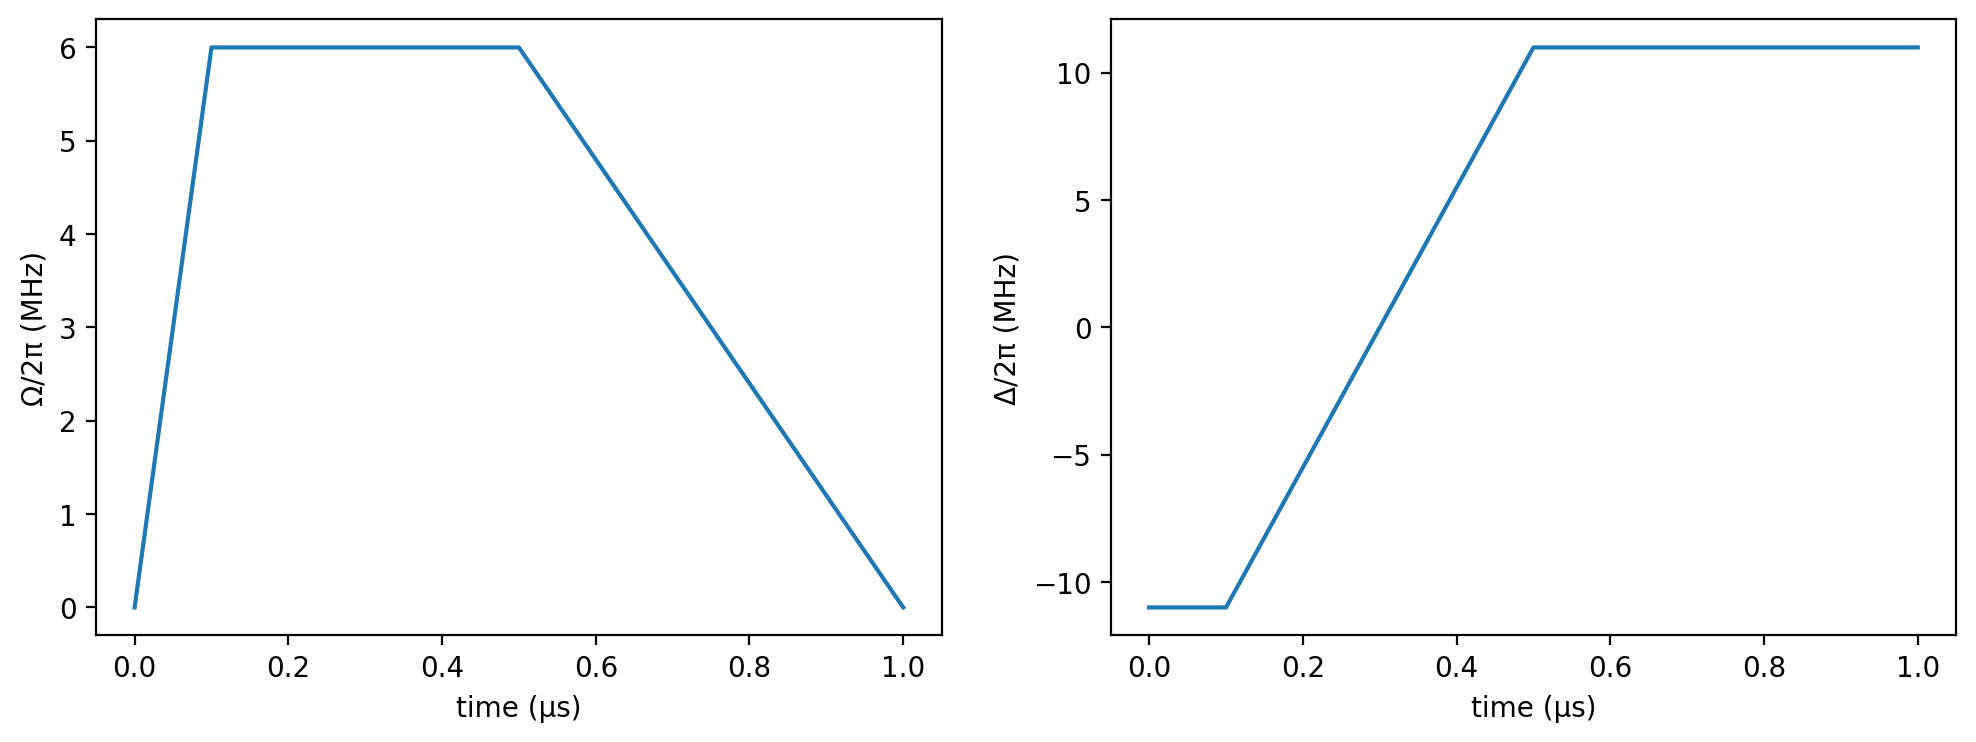

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))
Bloqade.plot!(ax1, Ω)
ax1.set_ylabel("Ω/2π (MHz)")
Bloqade.plot!(ax2, Δ)
ax2.set_ylabel("Δ/2π (MHz)")
fig

In [26]:
hamiltonian = rydberg_h(atoms; Ω = Ω, Δ = Δ)
prob = SchrodingerProblem(zero_state(nqubits(hamiltonian)), T_max, hamiltonian)
emulate!(prob)

SchrodingerProblem:
  register info:
    type: ArrayReg{2, ComplexF64, Matrix{ComplexF64}}
    storage size: 8 bytes

  time span (μs): (0.0, 1.0)

  equation: 
    storage size: 1.688 MiB
    expression:
nqubits: 13
+
├─ [+] ∑ 2π ⋅ 8.627e6.0/|r_i-r_j|^6 n_i n_j
├─ [+] Ω(t) ⋅ ∑ σ^x_i
└─ [-] Δ(t) ⋅ ∑ n_i


  options:
    save_everystep: false
    save_start: false
    save_on: false
    dense: false


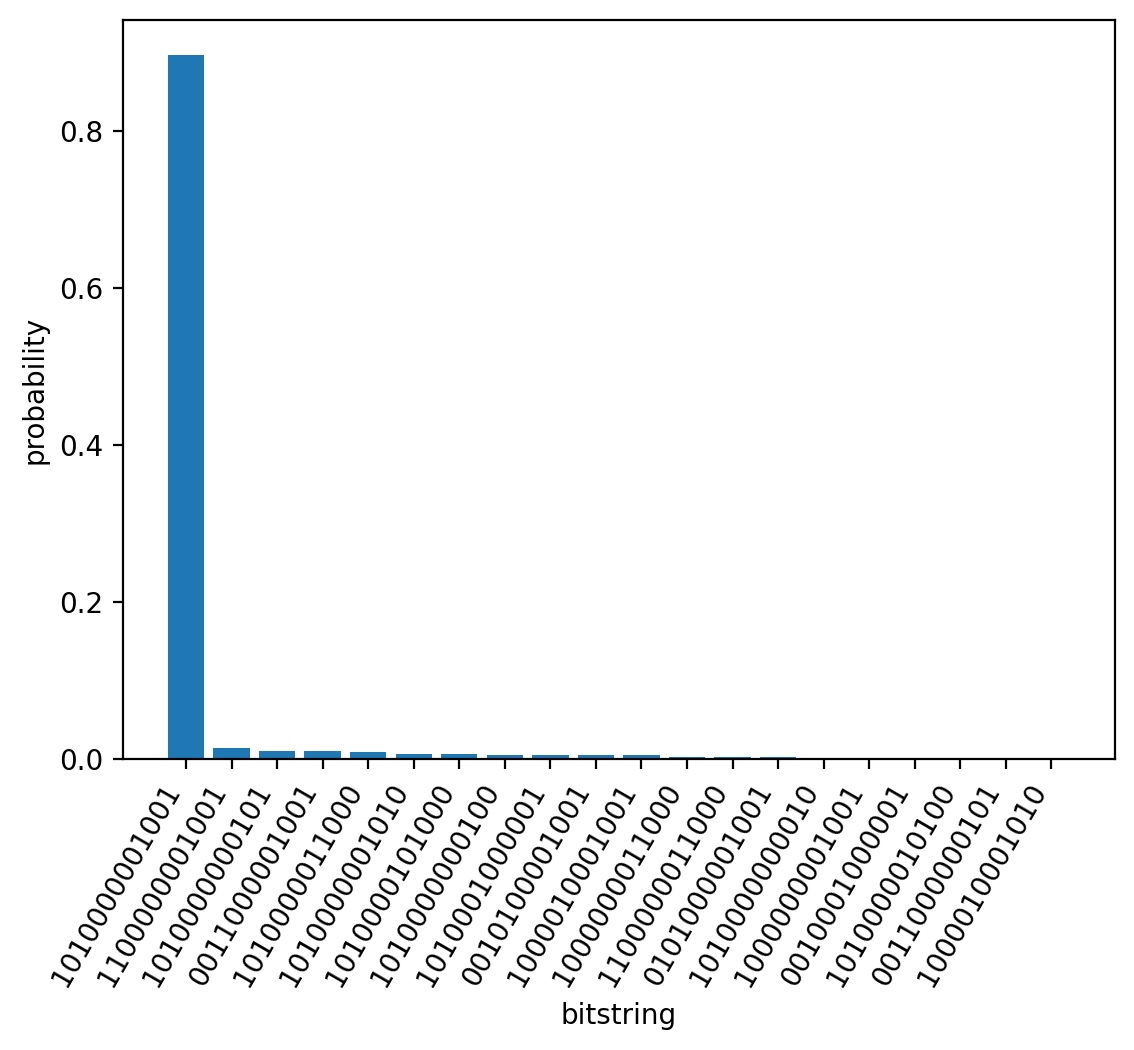

In [27]:
bitstring_hist(prob.reg; nlargest = 20)


In [28]:
best_bit_strings = most_probable(prob.reg, 2)
all_optimal_configs = GenericTensorNetworks.solve(IndependentSet(graph), ConfigsMax())[]
@assert all(bs -> GenericTensorNetworks.StaticBitVector([bs...]) ∈ all_optimal_configs.c, best_bit_strings)

# We can also visualize these atoms and check them visually:
Bloqade.plot(atoms, blockade_radius = 7.5; colors = [iszero(b) ? "white" : "red" for b in best_bit_strings[1]])
#
Bloqade.plot(atoms, blockade_radius = 7.5; colors = [iszero(b) ? "white" : "red" for b in best_bit_strings[2]])

LoadError: AssertionError: all((bs->begin
            #= In[28]:3 =#
            GenericTensorNetworks.StaticBitVector([bs...]) ∈ all_optimal_configs.c
        end), best_bit_strings)

In [29]:
best5_bit_strings = most_probable(prob.reg, 3)
BloqadeMIS.is_independent_set.(best5_bit_strings, Ref(graph))

3-element BitVector:
 1
 1
 1

In [30]:
fixed = mis_postprocessing(best5_bit_strings[3], graph)
BloqadeMIS.is_independent_set(fixed, graph)

true

In [31]:
# pulses

durations = fill(0.1, 6)
clocks = [0, cumsum(durations)...]
Ω2 = piecewise_constant(; clocks = clocks, values = repeat([Ω_max, 0.0], 3))
Δ2 = piecewise_constant(; clocks = clocks, values = repeat([0.0, Δ_end], 3))



                    ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Waveform{_, Float64}⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ 
                    ┌────────────────────────────────────────┐ 
                 20 │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⢀⣀⣀⣀⣀⣀⣀⡀⠀⠀⠀⠀⠀⠀⣀⣀⣀⣀⣀⣀⣀⠀⠀⠀⠀⠀⠀⣀⣀⣀⣀⣀⣀⣀│ 
   value (2π ⋅ MHz) │⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀

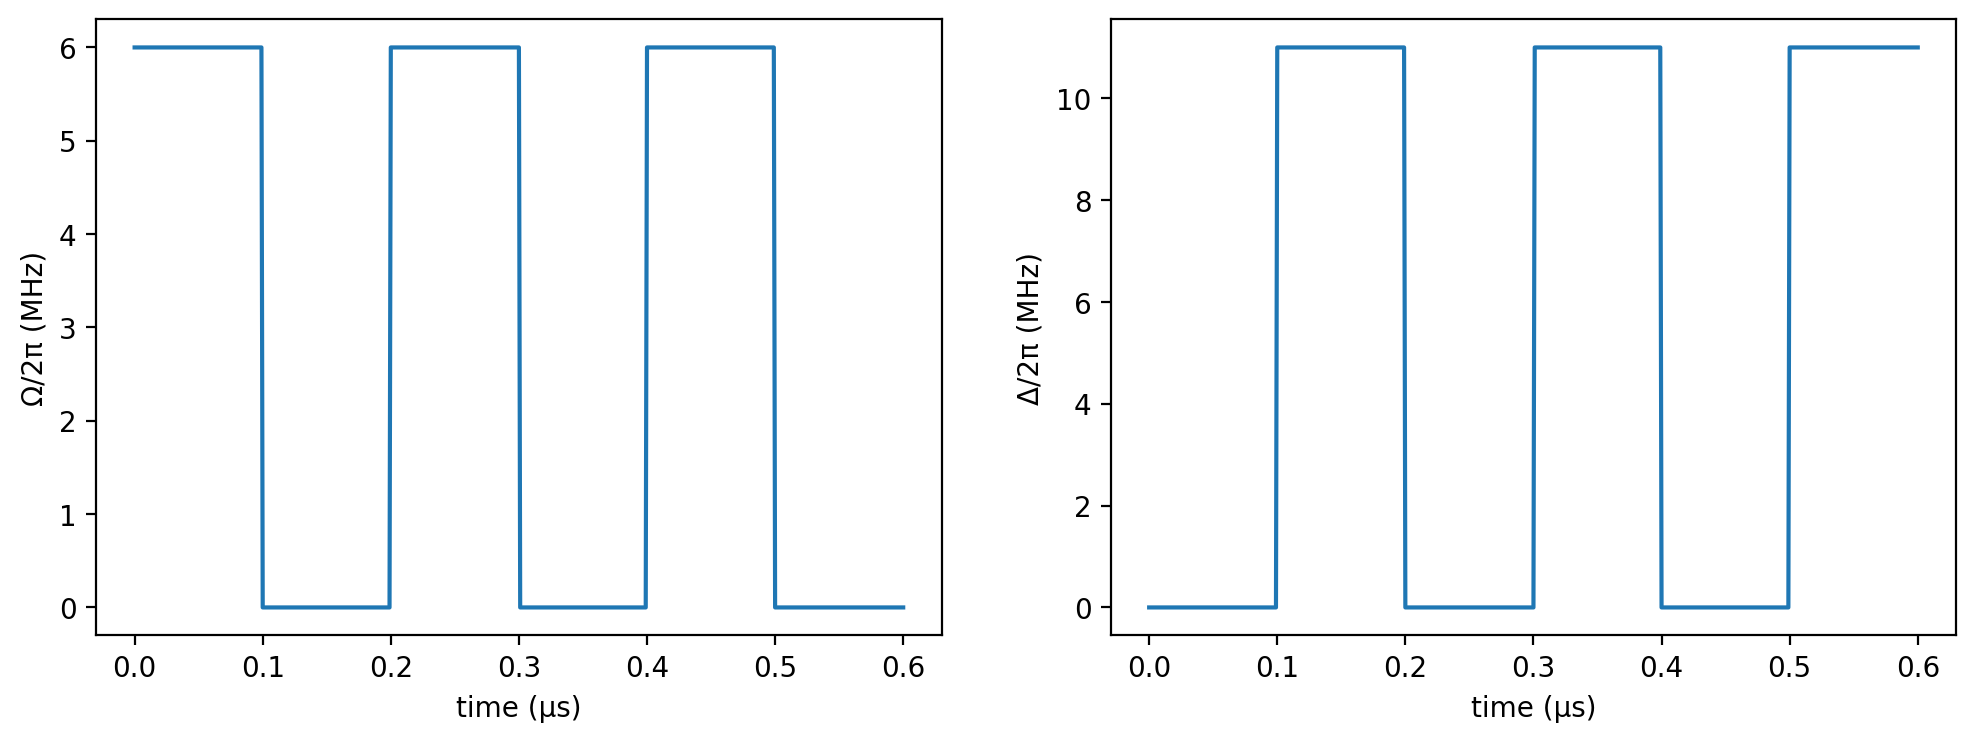

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))
Bloqade.plot!(ax1, Ω2)
ax1.set_ylabel("Ω/2π (MHz)")
Bloqade.plot!(ax2, Δ2)
ax2.set_ylabel("Δ/2π (MHz)")
fig

In [33]:
hamiltonian2 = rydberg_h(atoms; Ω = Ω2, Δ = Δ2)
nsites = length(atoms)
subspace = blockade_subspace(atoms, 5.5)  # within the blockade subspace : lowered
prob2 = KrylovEvolution(zero_state(subspace), clocks, hamiltonian2)
emulate!(prob2);

In [34]:
# average loss function after the time evolution:  
loss_MIS(reg) = -rydberg_density_sum(prob2.reg)
loss_MIS(prob2.reg)

-2.2191926068978556

In [35]:


function loss_piecewise_constant(atoms::AtomList, x::AbstractVector{T}) where {T}
    @assert length(x) % 2 == 0
    Ω_max = 4 * 2π*1
    Δ_end = 11 * 2π
    p = length(x) ÷ 2

    ## detuning and rabi terms
    durations = abs.(x)   # the durations of each layer of the QAOA pulse take the optimizing vector x as their input 
    clocks = [0, cumsum(durations)...]
    Ωs = piecewise_constant(; clocks = clocks, values = repeat(T[Ω_max, 0.0], p))
    Δs = piecewise_constant(; clocks = clocks, values = repeat(T[0.0, Δ_end], p))

    hamiltonian = rydberg_h(atoms; Ω = Ωs, Δ = Δs)
    subspace = blockade_subspace(atoms, 7.5)  # we run our simulation within the blockade subspace 
    prob = KrylovEvolution(zero_state(Complex{T}, subspace), clocks, hamiltonian)
    emulate!(prob)
    return -rydberg_density_sum(prob.reg), prob.reg
end



loss_piecewise_constant (generic function with 1 method)

In [36]:

x0 = durations
rydberg_density, reg1 = loss_piecewise_constant(atoms, x0)
rydberg_density

# The most probable bitstrings are:

bitstring_hist(reg1; nlargest = 20)

# We see that, without optimization, many of these bitstrings are not the MIS solutions.

# Let us now use the non-gradient-based optimizer `NelderMead` in the `Optim` package to optimize the loss function:
optresult = Optim.optimize(x -> loss_piecewise_constant(atoms, x)[1], x0)

rydberg_density_final, reg1_final = loss_piecewise_constant(atoms, optresult.minimizer)
rydberg_density_final





-3.3698807922402185

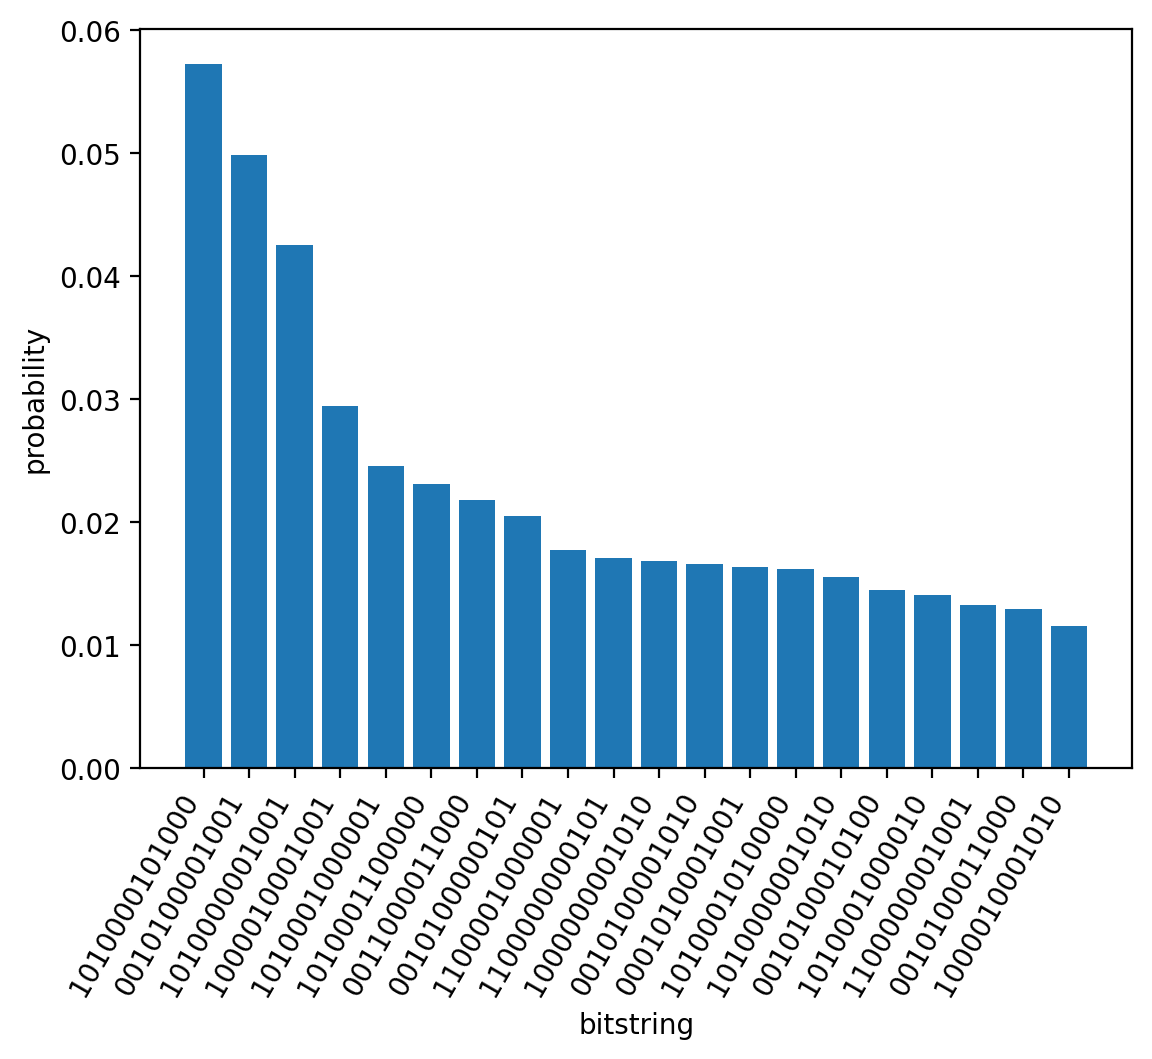

In [37]:
bitstring_hist(reg1_final; nlargest = 20)


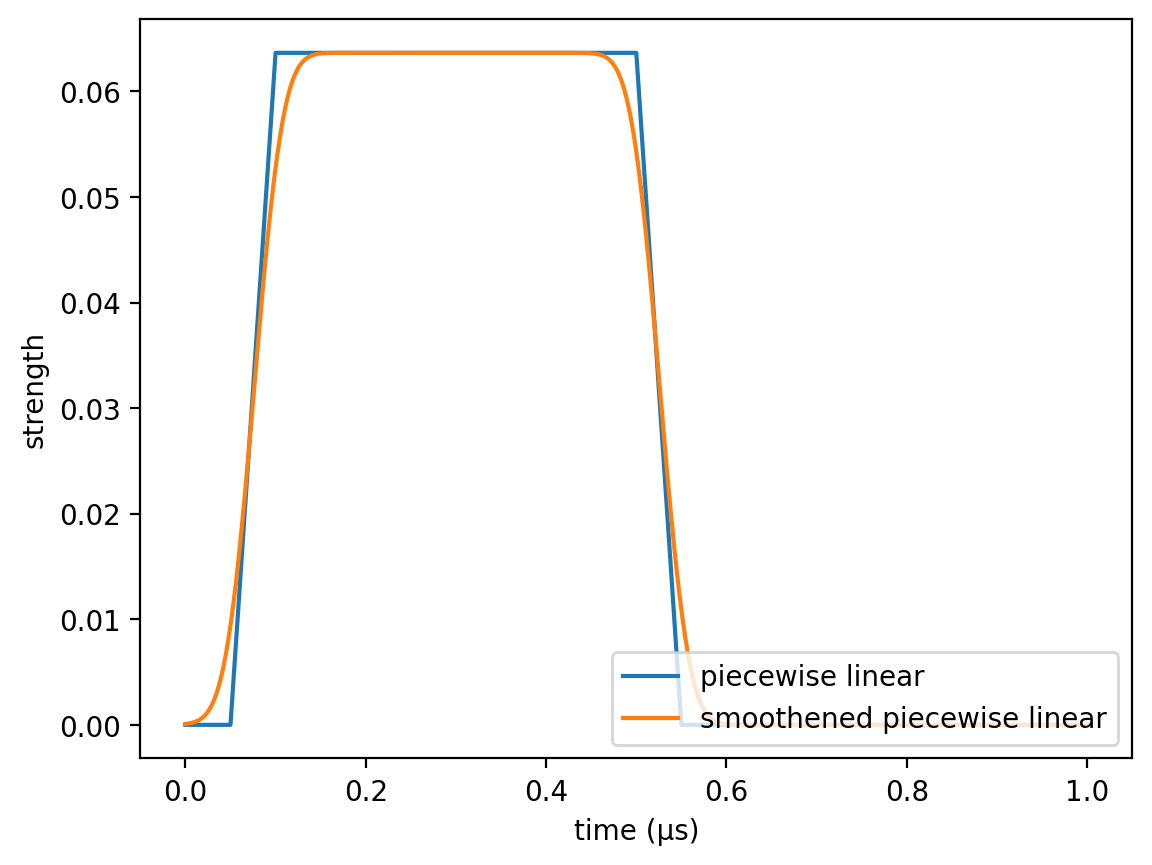

In [38]:
pulse_piecewise_linear = piecewise_linear(clocks = [0.0, 0.05, 0.1, 0.5, 0.55, T_max], values = [0, 0, 0.4, 0.4, 0, 0]);
pulse_smooth = smooth(pulse_piecewise_linear; kernel_radius = 0.02);

fig, ax = plt.subplots()
Bloqade.plot!(ax, pulse_piecewise_linear)
Bloqade.plot!(ax, pulse_smooth)
ax.set_ylabel("strength")
ax.legend(["piecewise linear", "smoothened piecewise linear"], loc = "lower right")
fig

In [48]:
function loss_piecewise_linear(atoms::AtomList, x::AbstractVector{T}) where {T}
    @assert length(x) == 3
    Ω_max = 6 * 2π
    Δ_start = -11 * 2π
    Δ_end = 11 * 2π
    Δ0 = 11 * 2π
    T_max = 0.6

    ## the strength of the detunings at each step takes the optimizing x as their input 
    Δs = smooth(
        piecewise_linear(
            clocks = T[0.0, 0.05, 0.2, 0.3, 0.4, 0.55, T_max],
            values = T[Δ_start, Δ_start, Δ0*x[1], Δ0*x[2], Δ0*x[3], Δ_end, Δ_end],
        );
        kernel_radius = 0.02,
    )
    Ωs = smooth(
        piecewise_linear(clocks = T[0.0, 0.05, 0.1, 0.5, 0.55, T_max], values = T[0, 0, Ω_max, Ω_max, 0, 0]);
        kernel_radius = 0.02,
    )

    hamiltonian = rydberg_h(atoms; Ω = Ωs, Δ = Δs)
    subspace = blockade_subspace(atoms, 7.5)
    prob = SchrodingerProblem(zero_state(Complex{T}, subspace), T_max, hamiltonian)
    emulate!(prob)
    return -rydberg_density_sum(prob.reg), prob.reg, Δs
end

loss_piecewise_linear (generic function with 1 method)

In [49]:
x0 = [0.1, 0.8, 0.8]; # initial point for the optimization

In [50]:
# Let us check the loss function : detuning range changed

Δ_start = -11 * 2π
Δ_end = 11 * 2π
Δ0 = 11 * 2π
T_max = 0.6+0.2
Δ_initial = piecewise_linear(
    clocks = [0.0, 0.05, 0.2, 0.3, 0.4, 0.55, T_max],
    values = [Δ_start, Δ_start, Δ0 * x0[1], Δ0 * x0[2], Δ0 * x0[3], Δ_end, Δ_end],
)

rydberg_density, reg2, Δ_initial_smooth = loss_piecewise_linear(atoms, x0)
rydberg_density

-3.8802341642296616

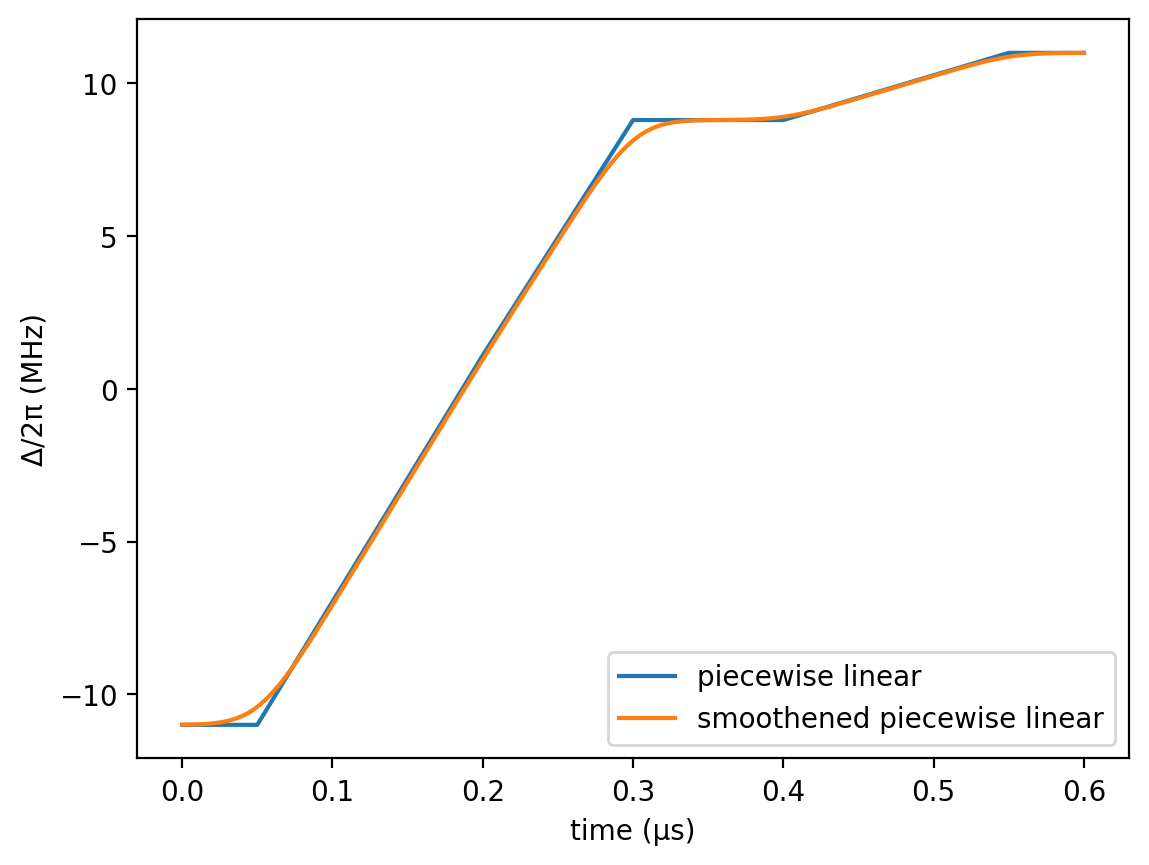

In [42]:
# And plot the smoothened waveform:

fig, ax = plt.subplots()
Bloqade.plot!(ax, Δ_initial)
Bloqade.plot!(ax, Δ_initial_smooth)
ax.set_ylabel("Δ/2π (MHz)")
ax.legend(["piecewise linear", "smoothened piecewise linear"], loc = "lower right")
fig

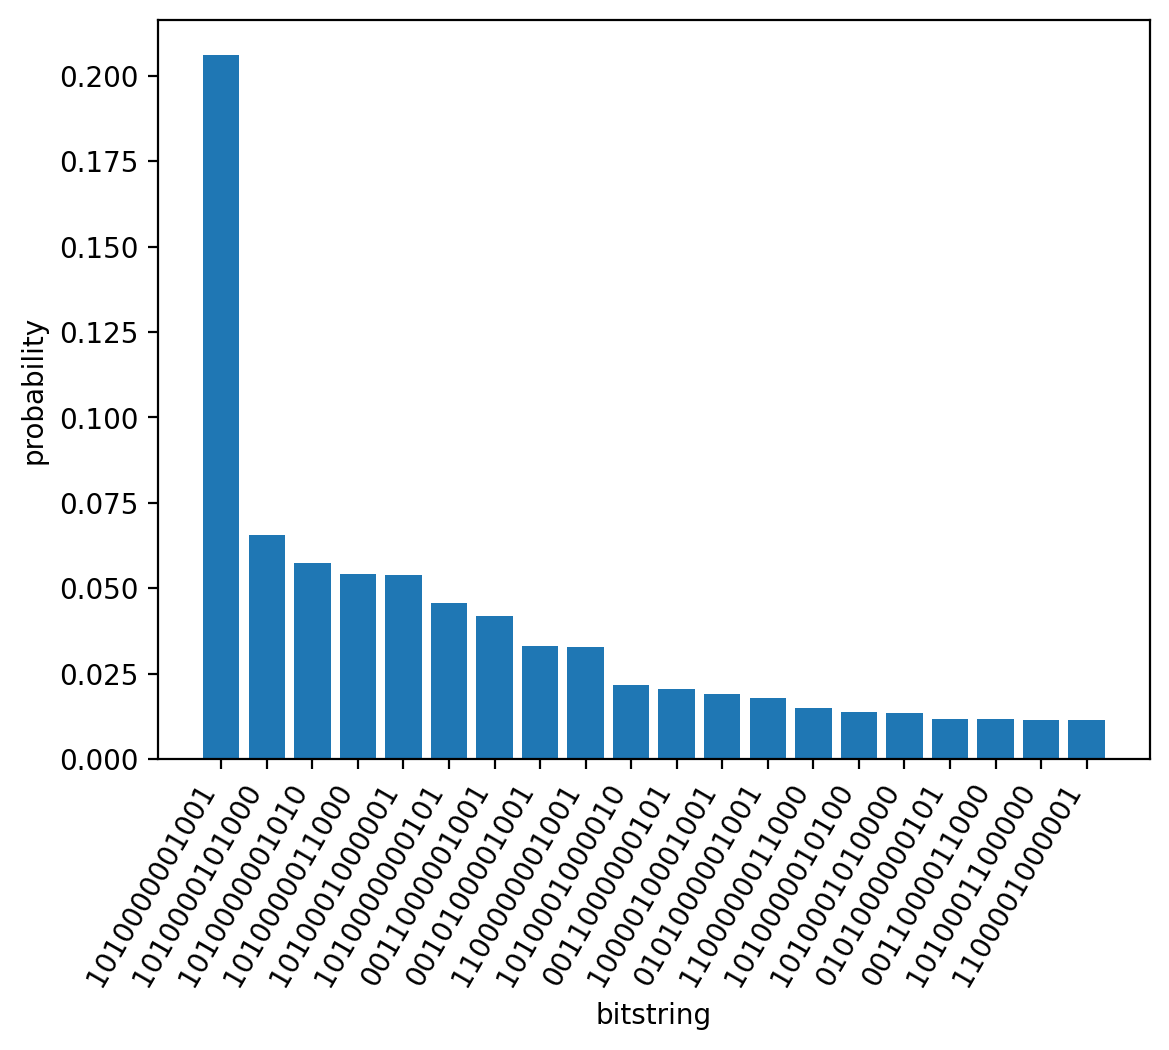

In [51]:
# Let's plot the distribution:
bitstring_hist(reg2; nlargest = 20)

In [52]:
# The performance of the algorithm is quite good. 
# Again, let us use the `NelderMead` optimizer to optimize the loss function:
optresult = Optim.optimize(x -> loss_piecewise_linear(atoms, x)[1], x0)


 * Status: success

 * Candidate solution
    Final objective value:     -3.978998e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   14  (vs limit Inf)
    Iterations:    72
    f(x) calls:    129


In [45]:
rydberg_density_final, reg_final, Δ_final = loss_piecewise_linear(atoms, optresult.minimizer)
rydberg_density_final

-3.9834682023095973

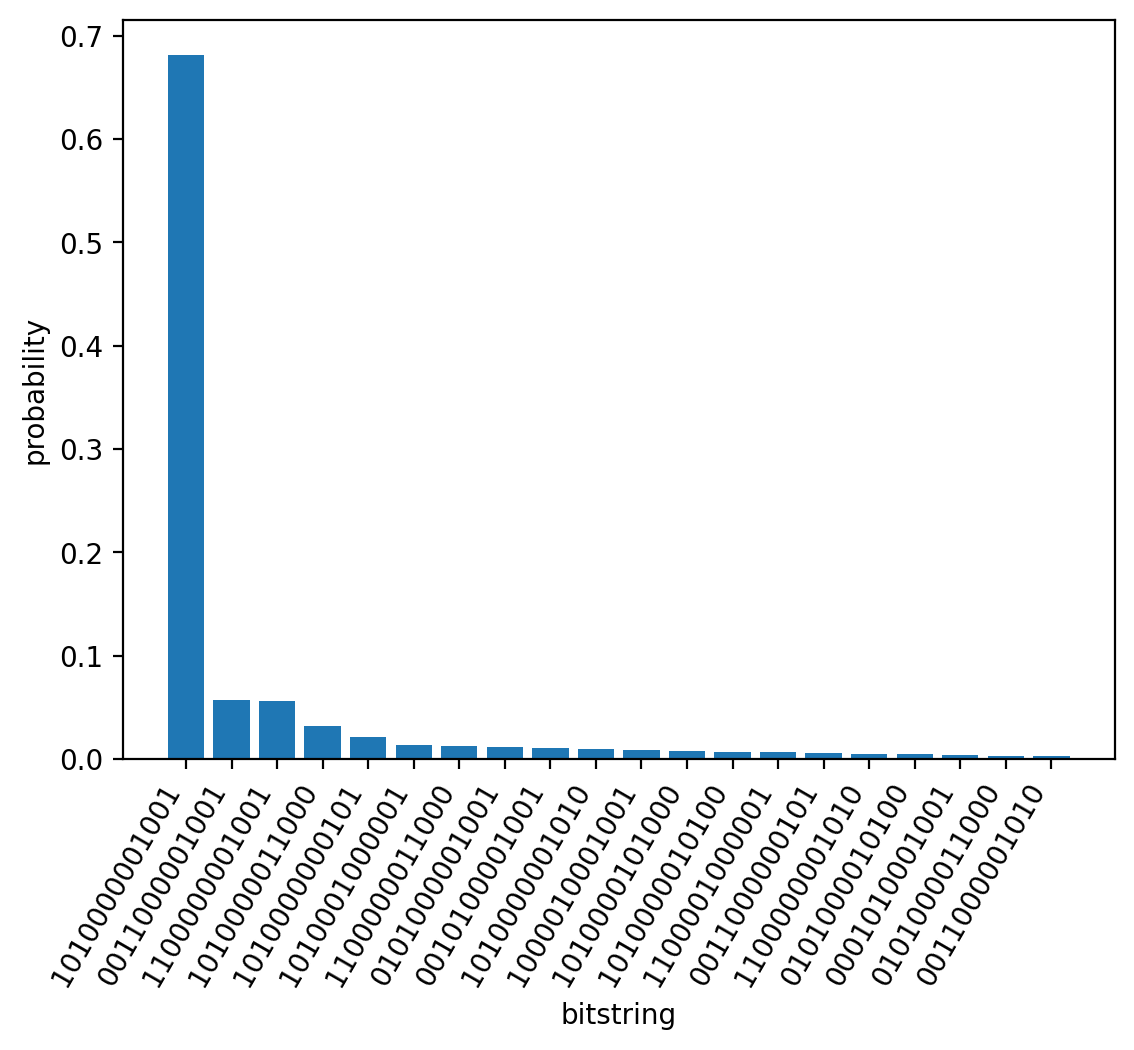

In [53]:
bitstring_hist(reg_final; nlargest = 20)

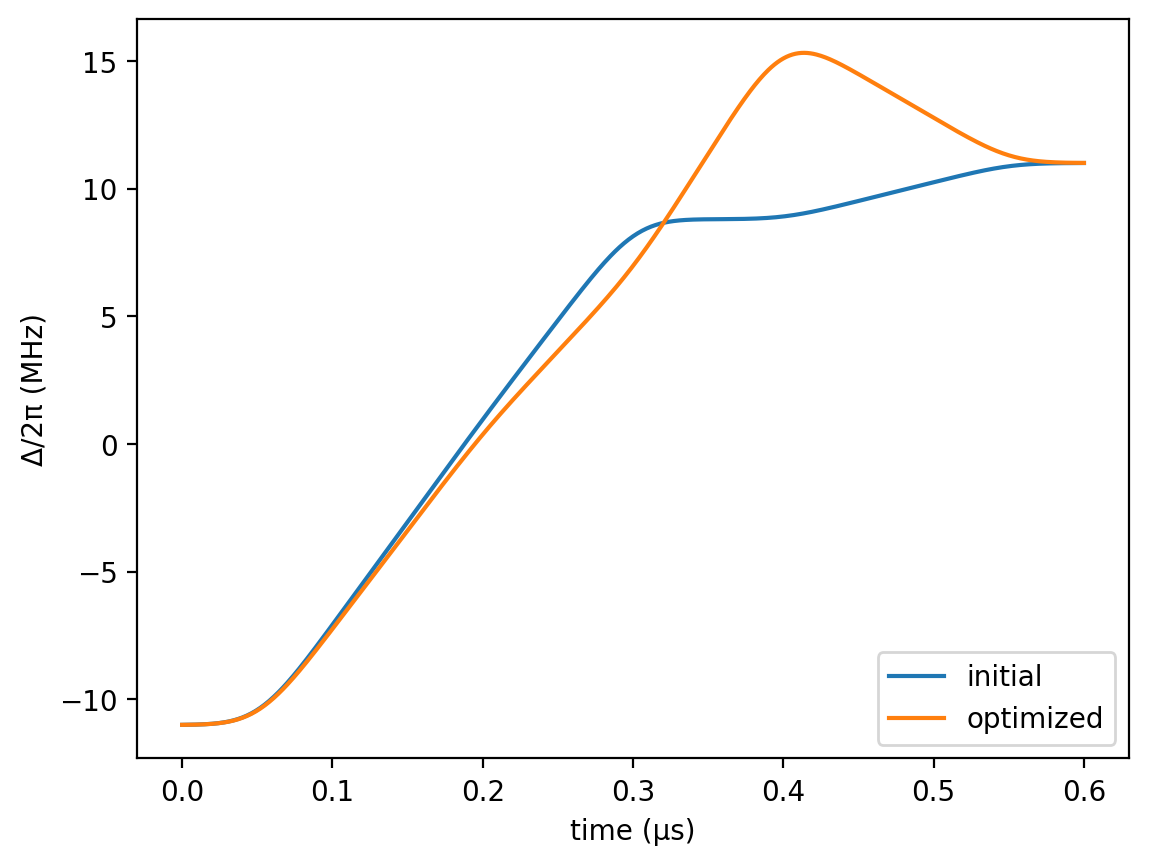

In [54]:
fig, ax = plt.subplots()
Bloqade.plot!(ax, Δ_initial_smooth)
Bloqade.plot!(ax, Δ_final)
ax.set_ylabel("Δ/2π (MHz)")
ax.legend(["initial", "optimized"], loc = "lower right")
fig